In [69]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [70]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [71]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [72]:
df = pd.read_csv('Churn_Modelling.csv')

In [73]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
## Divide the dataset into independent and dependent features

X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [75]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [76]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [77]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [78]:
## concat variable to dataframe
X.drop(labels=['Geography','Gender'],axis=1,inplace=True)

In [79]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [80]:
X = pd.concat([X,geography,gender],axis=1)

In [81]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [82]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [85]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [86]:
X_train.shape

(8000, 11)

In [87]:
#part 2 Now lets create ANN


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [89]:
### Initialize the ANN
classifier = Sequential()

In [90]:
### Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [91]:
## adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [92]:
## adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [93]:
## adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [94]:
#classifier.compile(optimizer='adam',loss='binary_cross_entropy',metrics=['accuracy'])
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [96]:
#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [100]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3419 - accuracy: 0.8589 - val_loss: 0.3673 - val_accuracy: 0.8470
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3406 - accuracy: 0.8593 - val_loss: 0.3680 - val_accuracy: 0.8508
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.3596 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3374 - accuracy: 0.8610 - val_loss: 0.3714 - val_accuracy: 0.8451
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3375 - accuracy: 0.8580 - val_loss: 0.3546 - val_accuracy: 0.8573
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3345 - accuracy: 0.8617 - val_loss: 0.3623 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3353 - accuracy: 0.8627 - val_loss: 0.3724 - val_accuracy:

In [98]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

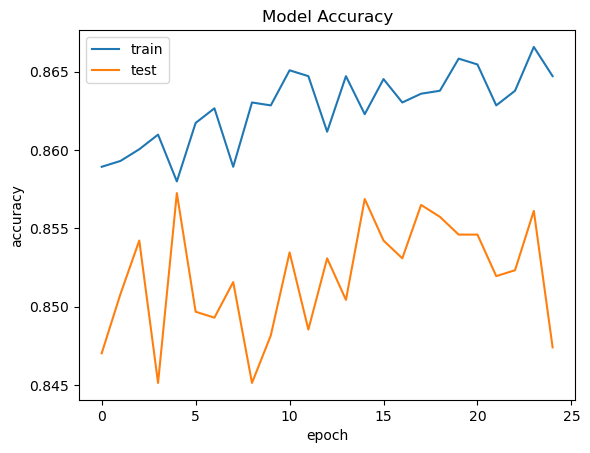

In [102]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [104]:
#part 3 making predictions and evaluting the model

# predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [105]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1552,   43],
       [ 235,  170]], dtype=int64)

In [106]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [107]:
score

0.861

In [108]:
## get the weights
classifier.get_weights()

[array([[-0.47140604, -0.15025781, -0.0300271 ,  0.6026819 , -0.39733702,
         -0.7037757 , -0.21343654,  0.4754222 , -0.34895766,  0.27943578,
         -0.00889996],
        [ 0.77757204,  0.8066685 ,  2.6499574 , -1.2711407 , -2.265156  ,
          1.9196498 ,  0.28527638, -2.3150096 ,  0.9984022 ,  0.8809987 ,
         -2.9128237 ],
        [-0.63674736,  0.14632544,  0.40416455,  1.8303543 ,  0.35309163,
         -0.5476136 ,  0.99868345, -0.12020855,  0.38103798,  1.2341384 ,
         -0.22024024],
        [-0.9816147 , -2.7684715 , -0.20498848, -2.0452516 , -0.14086099,
         -0.6719413 , -1.0461401 , -0.0056687 ,  0.68898493,  1.5566367 ,
         -0.5648944 ],
        [-3.4407313 ,  0.69420224,  1.1829039 , -0.9045537 ,  0.814114  ,
         -0.74089324,  0.96279573,  0.46094203,  3.5503132 , -0.1237039 ,
         -1.5664772 ],
        [-0.27311987, -0.49322775, -0.04080236, -0.91879576, -1.0377281 ,
         -0.6538387 , -0.53796494, -0.5282895 , -0.5221436 , -0.6260679